In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import request_chart as chart
import R_ts_functions as r

In [171]:
def get_candles(count):
    candles = chart.candle_min(count)

    # make as dataframe
    candles = pd.DataFrame(candles)

    # order dataframe as time order
    candles = candles[::-1].reset_index(drop=1)
    
    return candles

In [168]:
def get_open_price(count):
    return get_candles(count)[['opening_price']]

In [237]:
def get_trade_price(count):
    return get_candles(count)[['trade_price']]

In [254]:
############################################################################
# 시세 그래프
# 입력 : .
# 출력 : 시세 그래프 ( 최고가, 시작가, 최저가 )
############################################################################

def show_plot(candles):
    plt.figure(figsize=(14,6))

    plt.plot(candles[['opening_price', 'low_price', 'high_price']])

    plt.legend(['open', 'low', 'high'])

    plt.title('Movement of coin price as time flows', fontdict={'fontsize' : 30})
    plt.ylabel('price', fontdict={'fontsize' : 20})
    plt.xlabel('timeflow', fontdict={'fontsize' : 20})

    plt.show()

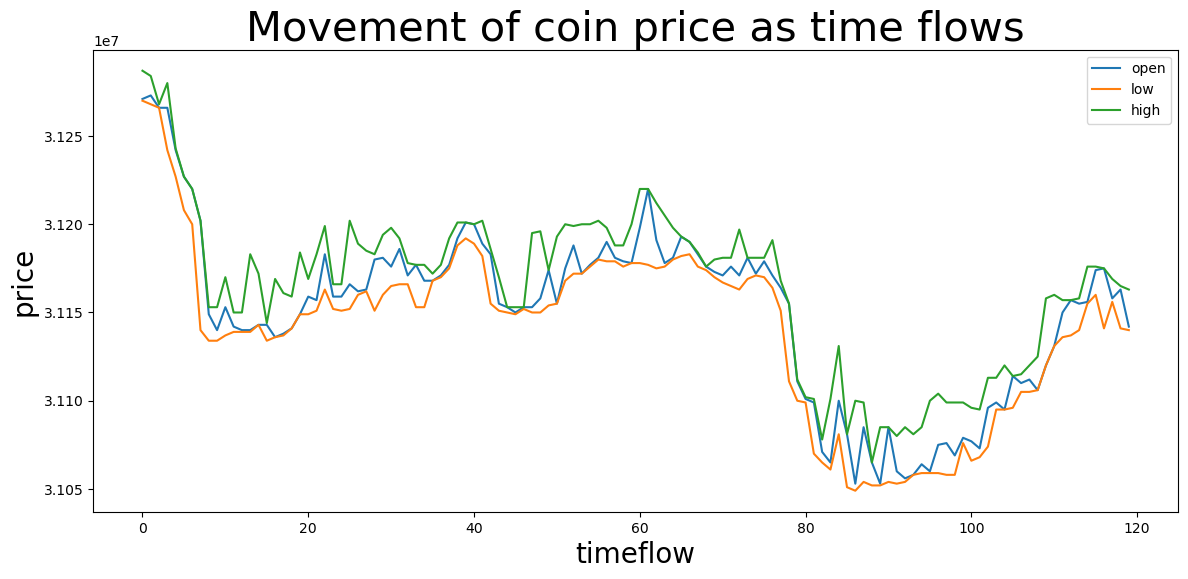

In [258]:
show_plot(get_candles(120))

In [303]:
############################################################################
# 평균이동선
# 입력 : ( series, days )
# 출력 : 지난 5일간 평균 가격 dataframe
############################################################################

def get_ma(Y, days=5):
    temp = (Y.cumsum() - Y.cumsum().shift(days)) / days
    temp = temp.rename(columns={'opening_price' : 'ma'})
    return temp

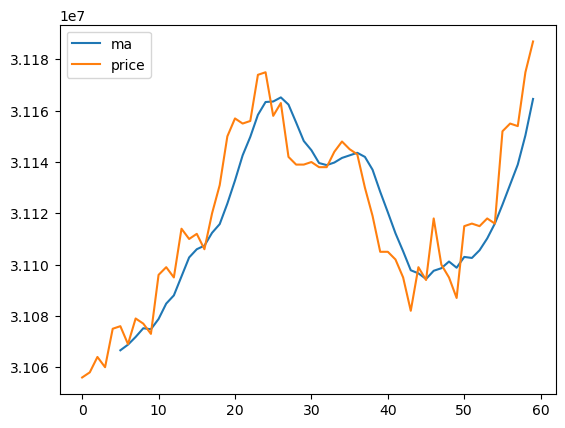

In [302]:
plt.plot(temp)
plt.plot(Y)
plt.legend(['ma', 'price'])

In [261]:
Y.shift(5)

,opening_price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
115,31171000.0
116,31176000.0
117,31171000.0
118,31181000.0
